In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

### Data Preprocessing

In [2]:
header = pd.read_csv('header.txt', sep=" ", header=None) 
df=pd.read_csv('data.csv',names=header[0].apply(lambda x: x.strip(',')).tolist())

In [3]:
df.head(5)

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [6]:
# missing values
df.isnull().sum()

CPL_wrt_BC         0
client_state       0
duration           0
num_prods          0
calls              0
CPL_wrt_self    1092
churn              0
avg_budget         0
BC                 0
clicks             0
dtype: int64

In [7]:
df.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,10000.000000,10000.000000,10000.000000,10000.000000,8908.000000,10000.00000,10000.000000,10000.000000
mean,-0.068958,27.669200,1.327200,4.526100,0.602664,0.20000,1512.601132,99.214900
std,0.491693,25.500847,0.816582,2.859185,11.135854,0.40002,3473.160720,31.701757
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,0.00000,9.090909,13.000000
25%,-0.103273,6.000000,1.000000,2.000000,-0.255226,0.00000,476.056955,76.000000
50%,-0.088810,19.000000,1.000000,5.000000,0.000000,0.00000,907.839383,96.000000
75%,-0.048530,42.000000,1.000000,7.000000,0.311280,0.00000,1666.499256,119.000000
max,19.088412,118.000000,11.000000,9.000000,841.288094,1.00000,148555.594376,253.000000


In [8]:
# check the missing value
df_na=df.loc[df.CPL_wrt_self.isnull()==True]

In [9]:
df_na.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,1092.000000,1092.000000,1092.000000,1092.000000,0.0,1092.000000,1092.000000,1092.000000
mean,-0.059654,30.146520,2.098901,4.673993,NaN,0.231685,2220.493682,100.171245
std,0.548032,30.420014,1.517185,2.836185,NaN,0.422102,3638.305641,31.955528
min,-0.991395,1.000000,0.000000,0.000000,NaN,0.000000,11.193019,35.000000
25%,-0.109149,3.000000,1.000000,2.000000,NaN,0.000000,605.310163,77.000000
50%,0.000000,19.000000,2.000000,5.000000,NaN,0.000000,1333.252550,95.000000
75%,0.000000,50.250000,3.000000,7.000000,NaN,0.000000,2516.738920,120.000000
max,8.452783,118.000000,11.000000,9.000000,NaN,1.000000,64764.472238,230.000000


In [10]:
df.loc[df.churn==1].describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,2000.000000,2000.000000,2000.000000,2000.000000,1747.000000,2000.0,2000.000000,2000.000000
mean,-0.069096,23.036000,1.250000,4.522500,0.188527,1.0,1237.311735,99.389000
std,0.565726,23.717735,0.702671,2.820545,3.122606,0.0,3715.808992,31.368897
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,1.0,15.673473,25.000000
25%,-0.105513,5.000000,1.000000,2.000000,-0.521494,1.0,385.474138,77.000000
50%,-0.088925,14.000000,1.000000,5.000000,-0.065336,1.0,712.107220,96.000000
75%,-0.047026,33.000000,1.000000,7.000000,0.085906,1.0,1373.648913,119.000000
max,15.833537,118.000000,7.000000,9.000000,95.279825,1.0,148555.594376,219.000000


In [11]:
df.loc[df.churn==0].describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,8000.000000,8000.00000,8000.000000,8000.000000,7161.000000,8000.0,8000.000000,8000.000000
mean,-0.068923,28.82750,1.346500,4.527000,0.703696,0.0,1581.423482,99.171375
std,0.471411,25.79918,0.841592,2.868937,12.322115,0.0,3406.572131,31.786224
min,-0.992477,1.00000,0.000000,0.000000,-1.000000,0.0,9.090909,13.000000
25%,-0.102743,7.00000,1.000000,2.000000,-0.208887,0.0,495.639703,76.000000
50%,-0.088790,21.00000,1.000000,5.000000,0.000000,0.0,963.184593,95.000000
75%,-0.048703,42.00000,1.000000,7.000000,0.347655,0.0,1752.698014,119.000000
max,19.088412,108.00000,11.000000,9.000000,841.288094,0.0,130613.298798,253.000000


In [12]:
df["CPL_wrt_self"]=df["CPL_wrt_self"].fillna(df["CPL_wrt_self"].median())

In [13]:
df.head(5)

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,0.000000,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [14]:
# Feature engineering

df['ave_clicks']=df['clicks']/df['duration']
df['clicks_to_budget']=df['clicks']/(df['avg_budget']*df['duration'])

In [15]:
df.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks,ave_clicks,clicks_to_budget
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.068958,27.669200,1.327200,4.526100,0.536853,0.20000,1512.601132,99.214900,16.276139,0.056715
std,0.491693,25.500847,0.816582,2.859185,10.511881,0.40002,3473.160720,31.701757,29.374992,0.306516
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,0.00000,9.090909,13.000000,0.181818,0.000006
25%,-0.103273,6.000000,1.000000,2.000000,-0.215060,0.00000,476.056955,76.000000,2.229167,0.001956
50%,-0.088810,19.000000,1.000000,5.000000,0.000000,0.00000,907.839383,96.000000,4.866667,0.005837
75%,-0.048530,42.000000,1.000000,7.000000,0.245392,0.00000,1666.499256,119.000000,13.500000,0.021701
max,19.088412,118.000000,11.000000,9.000000,841.288094,1.00000,148555.594376,253.000000,231.000000,9.288000


## Exploratory Data Analysis

#### *Plot the missing value counts for client state and business category

Text(0.5, 1.0, 'Count Plot of Business Category')

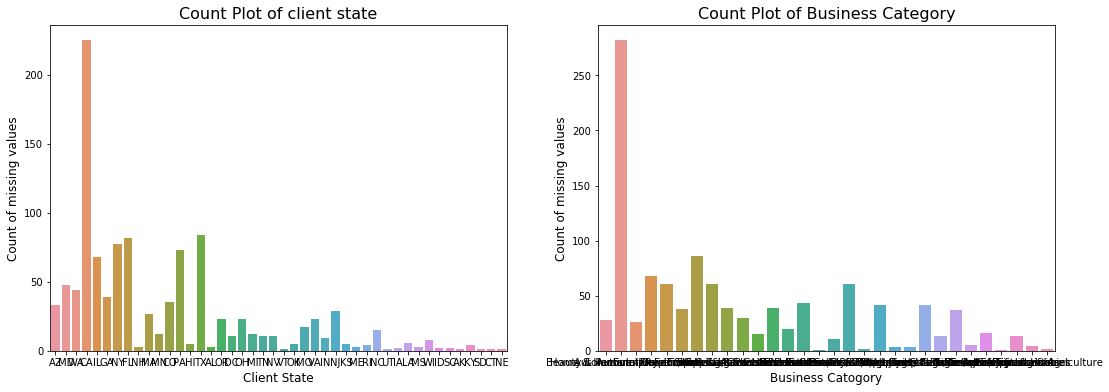

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='client_state', data=df_na, ax=ax[0])
ax[0].set_xlabel('Client State', fontsize=12)
ax[0].set_ylabel('Count of missing values', fontsize=12)
ax[0].set_title('Count Plot of client state', fontsize=16)

sns.countplot(x='BC', data=df_na, ax=ax[1])
ax[1].set_xlabel('Business Catogory', fontsize=12)
ax[1].set_ylabel('Count of missing values', fontsize=12)
ax[1].set_title('Count Plot of Business Category', fontsize=16)

Text(0.5, 1.0, 'churned')

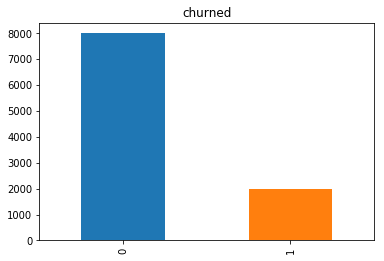

In [81]:

df.churn.value_counts().plot('bar').set_title('churned')

### Statistics of the churn and retention cohort

In [19]:
# the mean of the each groups
df.groupby(['churn']).mean()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,avg_budget,clicks,ave_clicks,clicks_to_budget
churn,,,,,,,,,
0,-0.068923,28.8275,1.3465,4.5270,0.703696,1581.423482,99.171375,16.418476,0.058373
1,-0.069096,23.0360,1.2500,4.5225,0.188527,1237.311735,99.389000,15.706790,0.050082


In [20]:
# the median of each group
df.groupby(['churn']).median()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,avg_budget,clicks,ave_clicks,clicks_to_budget
churn,,,,,,,,,
0,-0.088790,21,1,5,0.000000,963.184593,95,4.537088,0.005142
1,-0.088925,14,1,5,-0.065336,712.107220,96,6.818182,0.010056


Text(0.5, 0, 'number of products purchased')

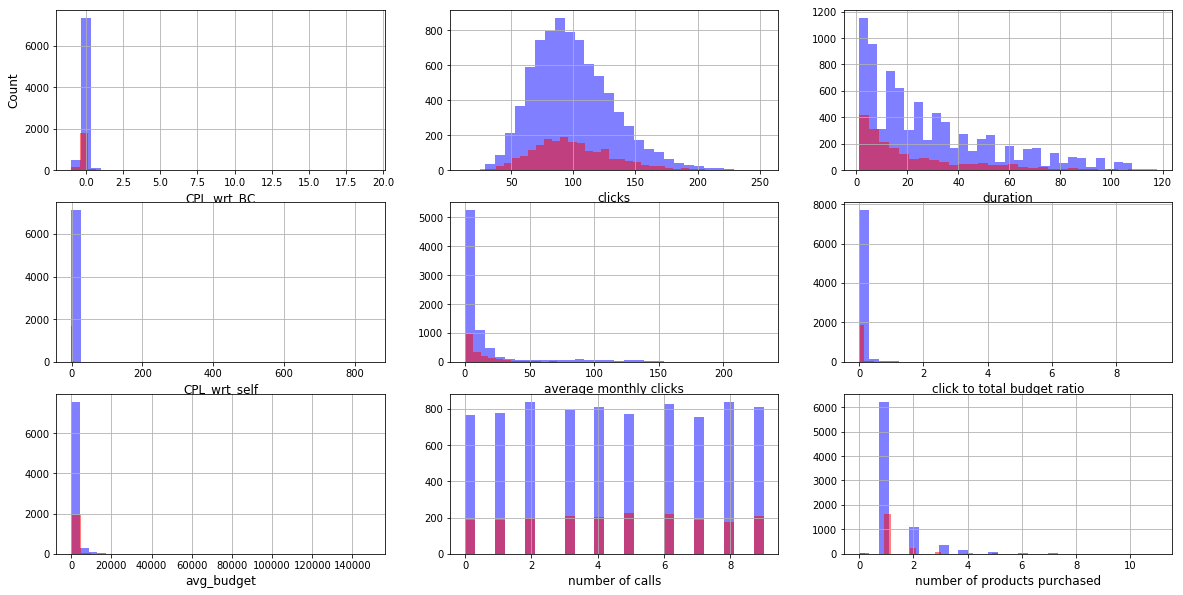

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
df[df.churn == 0]['CPL_wrt_BC'].hist(bins=30, color="blue", alpha=0.5, ax=ax[0,0])
df[df.churn == 1]['CPL_wrt_BC'].hist(bins=30, color="red", alpha=0.5, ax=ax[0,0])
ax[0,0].set_xlabel('CPL_wrt_BC', fontsize=12)
ax[0,0].set_ylabel('Count', fontsize=12)

df[df.churn == 0]['CPL_wrt_self'].hist(bins=30, color="blue", alpha=0.5, ax=ax[1,0])
df[df.churn == 1]['CPL_wrt_self'].hist(bins=30, color="red", alpha=0.5, ax=ax[1,0])
ax[1,0].set_xlabel('CPL_wrt_self', fontsize=12)

df[df.churn == 0]['avg_budget'].hist(bins=30, color="blue", alpha=0.5, ax=ax[2,0])
df[df.churn == 1]['avg_budget'].hist(bins=30, color="red", alpha=0.5, ax=ax[2,0])
ax[2,0].set_xlabel('avg_budget', fontsize=12)


df[df.churn == 0]['clicks'].hist(bins=30, color="blue", alpha=0.5, ax=ax[0,1])
df[df.churn == 1]['clicks'].hist(bins=30, color="red", alpha=0.5, ax=ax[0,1])
ax[0,1].set_xlabel('clicks', fontsize=12)


df[df.churn == 0]['duration'].hist(bins=30, color="blue", alpha=0.5, ax=ax[0,2])
df[df.churn == 1]['duration'].hist(bins=30, color="red", alpha=0.5, ax=ax[0,2])
ax[0,2].set_xlabel('duration', fontsize=12)

df[df.churn == 0]['ave_clicks'].hist(bins=30, color="blue", alpha=0.5, ax=ax[1,1])
df[df.churn == 1]['ave_clicks'].hist(bins=30, color="red", alpha=0.5, ax=ax[1,1])
ax[1,1].set_xlabel('average monthly clicks', fontsize=12)

df[df.churn == 0]['clicks_to_budget'].hist(bins=30, color="blue", alpha=0.5, ax=ax[1,2])
df[df.churn == 1]['clicks_to_budget'].hist(bins=30, color="red", alpha=0.5, ax=ax[1,2])
ax[1,2].set_xlabel('click to total budget ratio', fontsize=12)

df[df.churn == 0]['calls'].hist(bins=30, color="blue", alpha=0.5, ax=ax[2,1])
df[df.churn == 1]['calls'].hist(bins=30, color="red", alpha=0.5, ax=ax[2,1])
ax[2,1].set_xlabel('number of calls', fontsize=12)

df[df.churn == 0]['num_prods'].hist(bins=30, color="blue", alpha=0.5, ax=ax[2,2])
df[df.churn == 1]['num_prods'].hist(bins=30, color="red", alpha=0.5, ax=ax[2,2])
ax[2,2].set_xlabel('number of products purchased', fontsize=12)

In [101]:
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  
# To establish connection 
init_notebook_mode(connected = True) 

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.1, 'rgb(218,218,235)'],
    [0.2, 'rgb(188,189,220)'],
    [0.3, 'rgb(148,144,190)'],
    [0.4, 'rgb(117,107,177)'],
    [0.5, 'rgb(97,77,167)'],
    [1, 'rgb(84,39,143)']
]

# plot geographical plots 
data = dict(type = 'choropleth', 
  
            locations = df.groupby(['client_state'])['churn'].mean().index.tolist(), 
            
            # States of USA
            
            locationmode = 'USA-states',
            colorscale = scl, 
            autocolorscale = False,
              
            z = df.groupby(['client_state'])['churn'].mean().tolist(), 
            colorbar = {'title': 'Churn Rate',
        'tick0': 0,
        'tickmode': 'array',
        'tickvals': [0,0.1, 0.2,0.4, 0.6,0.8,1]}) 
              
layout = dict(geo ={'scope': 'usa'}) 

choromap = go.Figure(data = [data], layout = layout) 
  
# plotting graph 
iplot(choromap) 

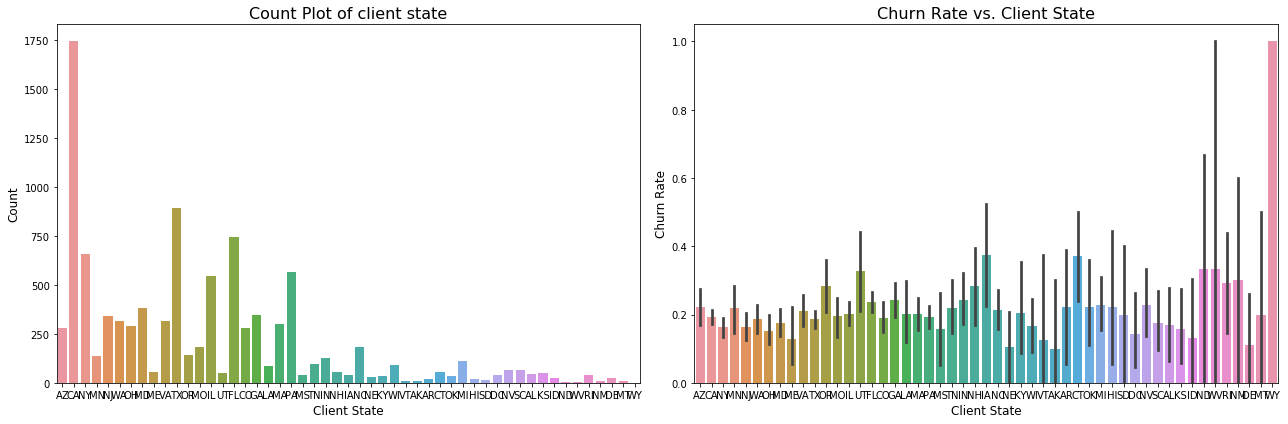

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='client_state', data=df, ax=ax[0])
ax[0].set_xlabel('Client State', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of client state', fontsize=16)

sns.barplot(x='client_state', y='churn', data=df, ax=ax[1])
ax[1].set_xlabel('Client State', fontsize=12)
ax[1].set_ylabel('Churn Rate', fontsize=12)
ax[1].set_title('Churn Rate vs. Client State', fontsize=16)
plt.tight_layout()
plt.show()

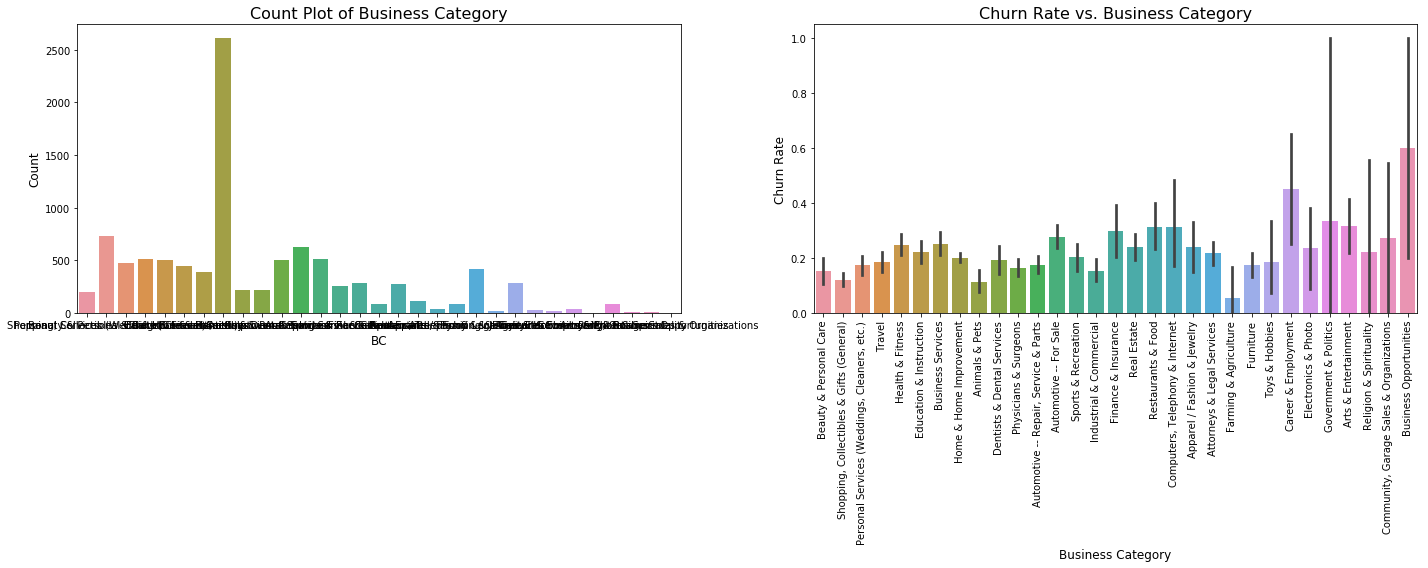

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x='BC', data=df, ax=ax[0])
plt.xticks(rotation=90)
ax[0].set_xlabel('BC', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Business Category', fontsize=16)
plt.xticks(rotation=90)


sns.barplot(x='BC', y='churn', data=df, ax=ax[1])

ax[1].set_xlabel('Business Category', fontsize=12)
ax[1].set_ylabel('Churn Rate', fontsize=12)
ax[1].set_title('Churn Rate vs. Business Category', fontsize=16)

plt.tight_layout()
plt.show()


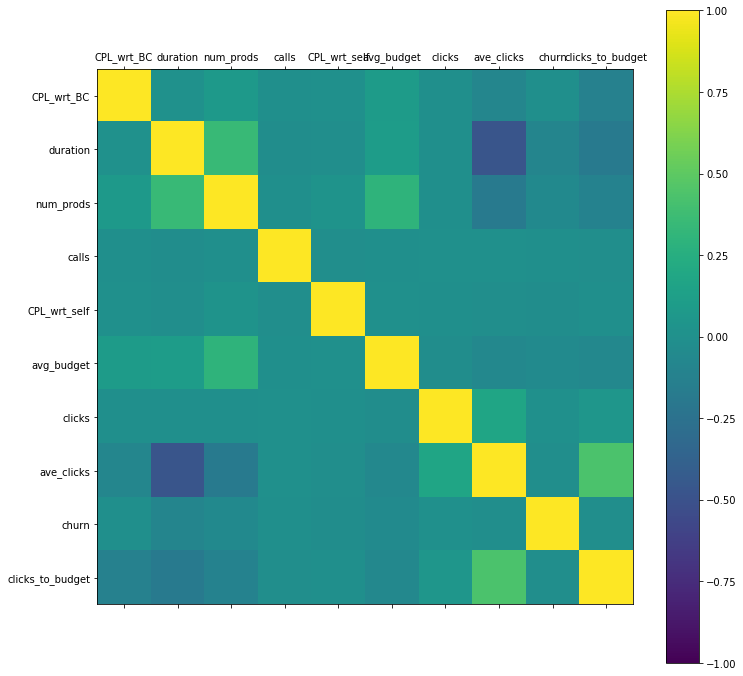

In [165]:
# check the feature correlations

names= [u'CPL_wrt_BC', u'duration', u'num_prods', u'calls',
       u'CPL_wrt_self', u'avg_budget',u'clicks', u'ave_clicks',u'churn',
       u'clicks_to_budget']
correlations = df[names].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

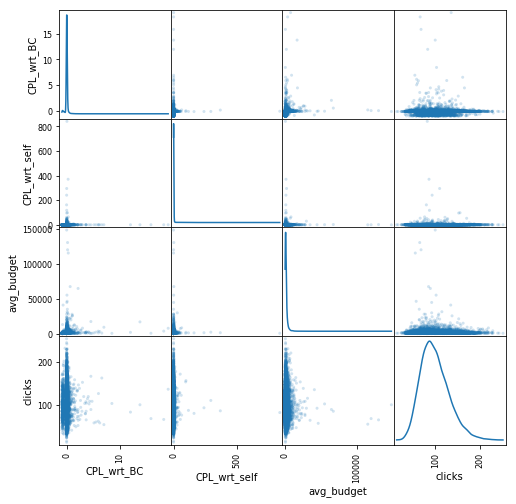

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[[u'CPL_wrt_BC', u'CPL_wrt_self', u'avg_budget',u'clicks']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

## Modeling 

In [14]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [15]:
# Initialize H2O cluster


h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,20 mins 15 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_jenny_u4pke1
H2O cluster total nodes:,1
H2O cluster free memory:,1.592 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [16]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(df)
h2o_df['churn'] = h2o_df['churn'].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks,ave_clicks,clicks_to_budget
type,real,enum,int,int,int,real,enum,real,enum,int,real,real
mins,-0.9945902155993926,,1.0,0.0,0.0,-1.0,,9.090909090909092,,13.0,0.18181818181818185,6.232858007249055e-06
mean,-0.06895781918746277,,27.669199999999982,1.3272000000000004,4.526100000000013,0.5368527618815563,,1512.601132172426,,99.21490000000034,16.27613880488324,0.05671459423512432
maxs,19.088412216137858,,118.0,11.0,9.0,841.2880942532022,,148555.59437565212,,253.0,231.0,9.288
sigma,0.4916930543858316,,25.500847058089473,0.8165824151205247,2.8591845487181025,10.511880590925694,,3473.16072019919,,31.701757335072383,29.374991819662508,0.30651596781132606
zeros,751,,0,64,957,2261,,0,,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,AZ,73.0,6.0,2.0,0.0,1,10082.152553646549,Beauty & Personal Care,107.0,1.4657534246575343,0.00014538100042211678
1,-0.6236175907148211,CA,1.0,1.0,3.0,0.0,0,133.92857142857144,"Shopping, Collectibles & Gifts (General)",79.0,79.0,0.5898666666666667
2,0.007904951127846251,NY,102.0,2.0,8.0,-0.2920080937808233,0,3935.017462023131,"Personal Services (Weddings, Cleaners, etc.)",90.0,0.8823529411764706,0.00022423101033021132


In [17]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['churn'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['CPL_wrt_BC', 'client_state', 'duration', 'num_prods', 'calls',
       'CPL_wrt_self', 'avg_budget', 'BC', 'clicks', 'ave_clicks',
       'clicks_to_budget']
target = 'churn'

In [26]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=3, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


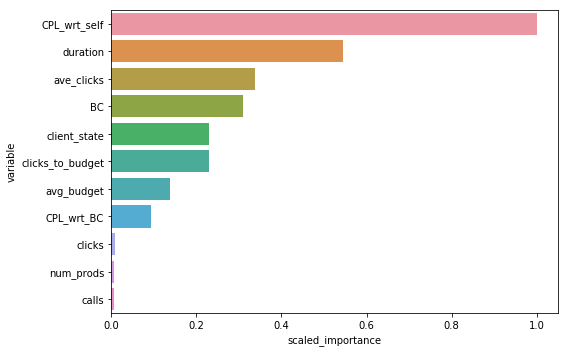

In [27]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.tight_layout()
plt.show()

### Plot the predicted churn probability

In [129]:
# Make predictions
train_true = train.as_data_frame()['churn'].values
test_true = test.as_data_frame()['churn'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\jenny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\jenny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\jenny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2000
           1       0.00      0.00      0.00       500

   micro avg       0.80      0.80      0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



In [125]:
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.2).astype(int)))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2000
           1       0.34      0.61      0.43       500

   micro avg       0.68      0.68      0.68      2500
   macro avg       0.61      0.65      0.61      2500
weighted avg       0.77      0.68      0.71      2500



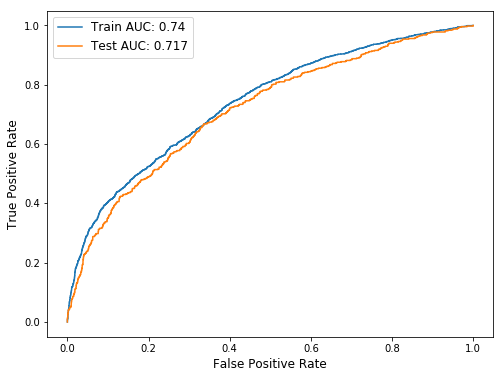

In [29]:
# ROC curves
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

Text(0.5, 0, 'average monthly clicks')

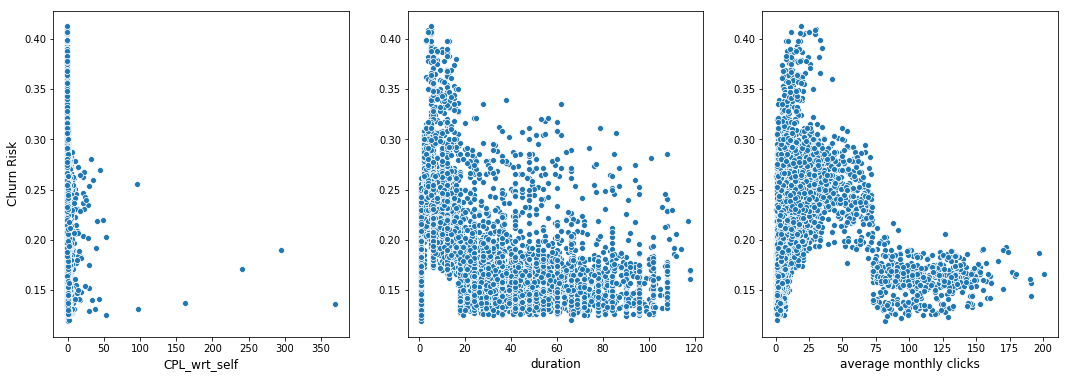

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.scatterplot(x=train.as_data_frame()['CPL_wrt_self'].values,y=train_pred,ax=ax[0])
ax[0].set_xlabel('CPL_wrt_self', fontsize=12)
ax[0].set_ylabel('Churn Risk', fontsize=12)


sns.scatterplot(x=train.as_data_frame()['duration'].values,y=train_pred,ax=ax[1])
ax[1].set_xlabel('duration', fontsize=12)

sns.scatterplot(x=train.as_data_frame()['ave_clicks'].values,y=train_pred,ax=ax[2])
ax[2].set_xlabel('average monthly clicks', fontsize=12)

In [30]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
model_logistic = H2OGeneralizedLinearEstimator(family = "binomial")
model_logistic.train(x=feature, y= target, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


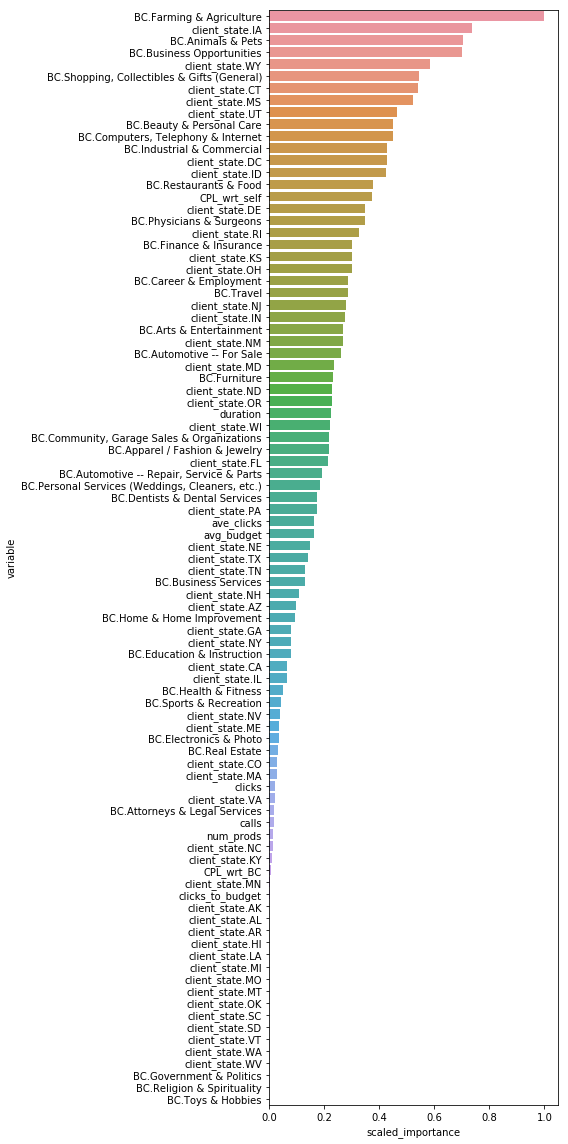

In [34]:
importance = model_logistic.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(8, 16))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.tight_layout()
plt.show()

In [126]:
# Make predictions
train_true = train.as_data_frame()['churn'].values
test_true = test.as_data_frame()['churn'].values
train_pred = model_logistic.predict(train).as_data_frame()['p1'].values
test_pred = model_logistic.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2000
           1       0.60      0.01      0.01       500

   micro avg       0.80      0.80      0.80      2500
   macro avg       0.70      0.50      0.45      2500
weighted avg       0.76      0.80      0.71      2500



In [127]:
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.2).astype(int)))

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      2000
           1       0.26      0.63      0.37       500

   micro avg       0.56      0.56      0.56      2500
   macro avg       0.56      0.59      0.52      2500
weighted avg       0.74      0.56      0.61      2500



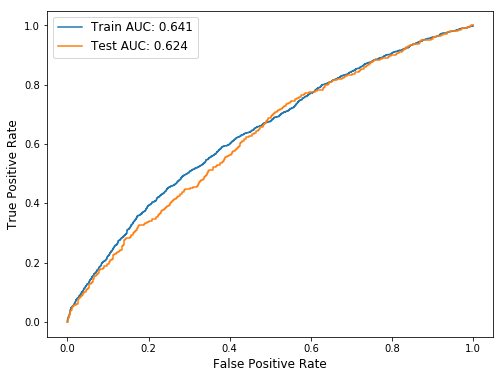

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()